## From HyTcWaves: Obtain TC parameters associated with maximum TWL

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# common
import os
import os.path as op
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

# pip
import xarray as xr
import numpy as np

# DEV: override installed teslakit
import sys
sys.path.insert(0, op.join(os.path.abspath(''), '..', '..', '..'))

# teslakit 
from teslakit.database import Database


In [2]:
# --------------------------------------
# Teslakit database

p_data = r'/media/administrador/HD/Dropbox/Guam/teslakit/data'
# p_data=r'/Users/laurac/Dropbox/Guam/teslakit/data'

db = Database(p_data)

# set site
db.SetSite('GUAM')


In [3]:
TCs_r2_sim_params = db.Load_TCs_r2_sim_params()
TCs_r2_MDA_params = db.Load_TCs_r2_mda_params()

In [4]:
#Simulations

# sims= pd.read_pickle(r'/Users/laurac/Dropbox/Guam/teslakit/data/sites/GUAM/TCs/dataset_r2_Guam_Sara.pkl')

TCs_sims_offsh=xr.open_dataset(os.path.join(p_data,'sites/GUAM/TCs/output_nonstat_pts_guam_mda_500_nest0.nc'))
TCs_sims_offsh

<xarray.Dataset>
Dimensions:     (case: 500, point: 8, time: 1147)
Coordinates:
  * time        (time) datetime64[ns] 2020-01-01 ... 2020-01-16T22:00:00
  * case        (case) int64 0 1 2 3 4 5 6 7 ... 492 493 494 495 496 497 498 499
Dimensions without coordinates: point
Data variables:
    Hsig        (case, point, time) float64 ...
    Dir         (case, point, time) float64 ...
    PkDir       (case, point, time) float64 ...
    Tm02        (case, point, time) float64 ...
    Tp          (case, point, time) float64 ...
    Dspr        (case, point, time) float64 ...
    WaterLevel  (case, point, time) float64 ...
    Windv_x     (case, point, time) float64 ...
    Windv_y     (case, point, time) float64 ...
    x_point     (case, point) float64 ...
    y_point     (case, point) float64 ...
Attributes:
    mesh_ID:  nest0

In [5]:
a=TCs_sims_offsh.Tp.values

s=np.where(a<0)
while len(s[0])>=1:
    a[s[0],s[1],s[2]]=a[s[0],s[1],s[2]-1]
    s=np.where(a<0)

TCs_sims_offsh['Tp']=(['case','point','time'],a)

In [14]:
#Wind speed and direction

ws=np.sqrt(TCs_sims_offsh.Windv_x**2 + TCs_sims_offsh.Windv_y**2)
wd=np.rad2deg(np.arctan2(np.deg2rad(TCs_sims_offsh.Windv_x),np.deg2rad(TCs_sims_offsh.Windv_y)))+180

TCs_sims_offsh['wind_speed']=ws
TCs_sims_offsh['wind_dir']=wd

TCs_sims_offsh

<xarray.Dataset>
Dimensions:     (case: 500, point: 8, time: 1147)
Coordinates:
  * time        (time) datetime64[ns] 2020-01-01 ... 2020-01-16T22:00:00
  * case        (case) int64 0 1 2 3 4 5 6 7 ... 492 493 494 495 496 497 498 499
Dimensions without coordinates: point
Data variables:
    Hsig        (case, point, time) float64 ...
    Dir         (case, point, time) float64 ...
    PkDir       (case, point, time) float64 ...
    Tm02        (case, point, time) float64 ...
    Tp          (case, point, time) float64 1.961 1.961 1.961 ... nan nan nan
    Dspr        (case, point, time) float64 ...
    WaterLevel  (case, point, time) float64 ...
    Windv_x     (case, point, time) float64 -0.03 -0.03 -0.03 ... nan nan nan
    Windv_y     (case, point, time) float64 0.06 0.06 0.06 ... nan nan nan
    x_point     (case, point) float64 ...
    y_point     (case, point) float64 ...
    wind_speed  (case, point, time) float64 0.06708 0.06708 0.06708 ... nan nan
    wind_dir    (case, point, time) float64 153.4 153.4 153.4 ... nan nan nan
Attributes:
    mesh_ID:  nest0

Text(0, 0.5, 'Wind dir (º)')

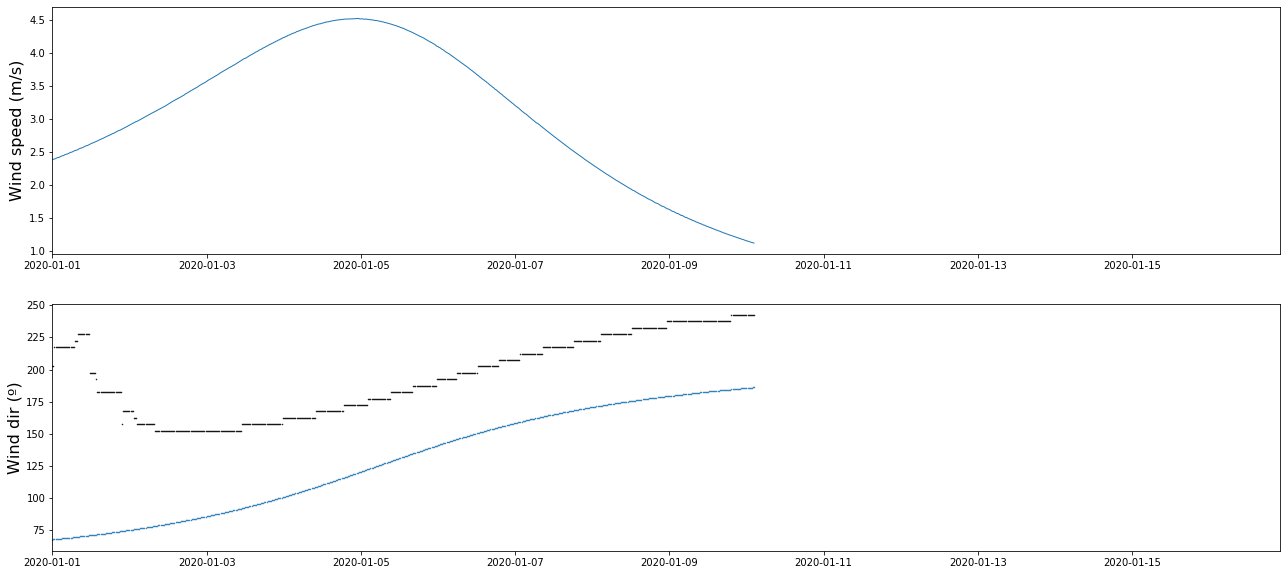

In [57]:
fig=plt.figure(figsize=[22,10])
gs1=gridspec.GridSpec(2,1)
ax=fig.add_subplot(gs1[0])
ax1=fig.add_subplot(gs1[1],sharex=ax)
pt=3 #Point 7 in front of the harbour
# ax2=fig.add_subplot(gs1[2],sharex=ax)
for c in [5]:#range(40): #range(len(TCs_sims_offsh.case)):
    ax.plot(TCs_sims_offsh.time,TCs_sims_offsh.sel(case=c,point=pt).wind_speed,linewidth=1)
#     ax.plot(TCs_sims_offsh.time,TCs_sims_offsh.sel(case=c,point=7).Hsig,'k.',markersize=1)
    ax1.plot(TCs_sims_offsh.time,TCs_sims_offsh.sel(case=c,point=pt).wind_dir,'.',markersize=1)
    ax1.plot(TCs_sims_offsh.time,TCs_sims_offsh.sel(case=c,point=pt).PkDir,'k.',markersize=1)
#     ax.plot(TCs_sims_offsh.time,TCs_sims_offsh.Windv_x.sel(case=c,point=7),linewidth=1)
#     ax1.plot(TCs_sims_offsh.time,TCs_sims_offsh.Windv_y.sel(case=c,point=7),'.',markersize=1)
ax.set_xlim([TCs_sims_offsh.time[0],TCs_sims_offsh.time[-1]])
ax.set_ylabel('Wind speed (m/s)',fontsize=16)
ax1.set_ylabel('Wind dir (º)',fontsize=16 )
# ax2.set_ylabel('Wdir',fontsize=16 )


Text(0, 0.5, 'Dir (º)')

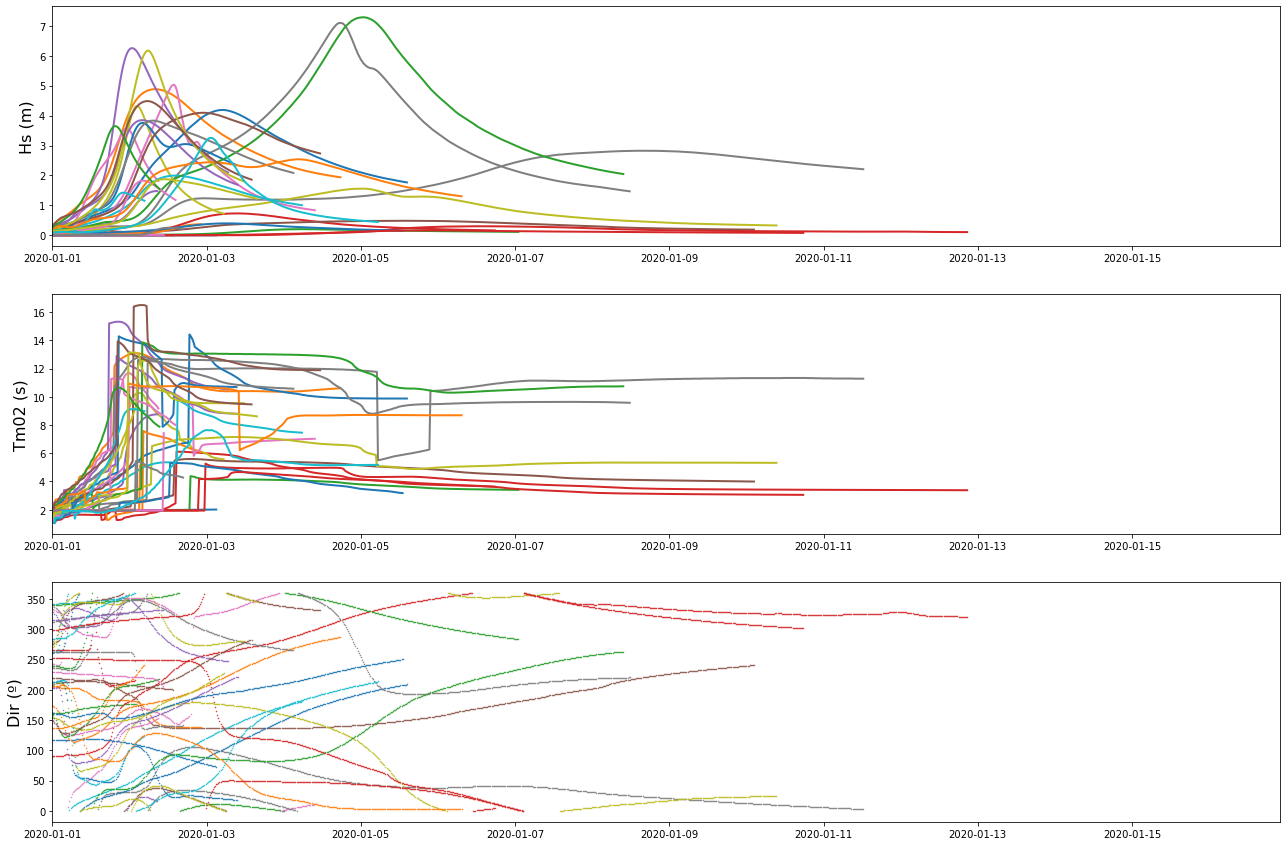

In [6]:
fig=plt.figure(figsize=[22,15])
gs1=gridspec.GridSpec(3,1)
ax=fig.add_subplot(gs1[0])
ax1=fig.add_subplot(gs1[1],sharex=ax)
ax2=fig.add_subplot(gs1[2],sharex=ax)

for c in range(40): #range(len(TCs_sims_offsh.case)):
    ax.plot(TCs_sims_offsh.time,TCs_sims_offsh.sel(case=c,point=7).Hsig,linewidth=2)
    ax1.plot(TCs_sims_offsh.time,TCs_sims_offsh.sel(case=c,point=7).Tp,linewidth=2)
    ax2.plot(TCs_sims_offsh.time,TCs_sims_offsh.sel(case=c,point=7).Dir,'.',markersize=1)

ax.set_xlim([TCs_sims_offsh.time[0],TCs_sims_offsh.time[-1]])
ax.set_ylabel('Hs (m)',fontsize=16)
ax1.set_ylabel('Tm02 (s)',fontsize=16 )
ax2.set_ylabel('Dir (º)',fontsize=16)

In [75]:
#Run once and get p_mean value

# SLP = db.Load_ESTELA_SLP()                # ESTELA Sea Level Pressure
# p_mean=np.nanmean(SLP.SLP.values)/100
# print(p_mean)

p_mean=1009.915 # mean pressure from historical records

<xarray.Dataset>
Dimensions:     (storm: 500)
Coordinates:
    time        (storm) datetime64[ns] 2020-01-03T03:00:00 ... 2020-01-02T05:...
    case        (storm) int64 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499
  * storm       (storm) int64 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499
Data variables:
    hs          (storm) float64 0.0001502 4.785 0.01277 ... 0.5022 4.091 6.925
    dir         (storm) float64 72.98 176.5 175.8 264.3 ... 141.9 8.637 5.776
    PkDir       (storm) float64 62.5 192.5 162.5 277.5 ... 52.5 142.5 37.5 37.5
    Tm02        (storm) float64 1.761 6.998 1.568 2.746 ... 2.615 6.589 8.326
    tp          (storm) float64 2.014 12.96 1.972 5.881 ... 5.946 11.77 13.85
    Dspr        (storm) float64 35.64 32.67 27.2 30.16 ... 25.96 42.82 45.21
    WaterLevel  (storm) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    Windv_x     (storm) float64 -0.02 -11.59 0.15 5.391 ... -2.766 14.82 22.17
    Windv_y     (storm) float64 -0.09 12.14 -0.1 2.909 ... 

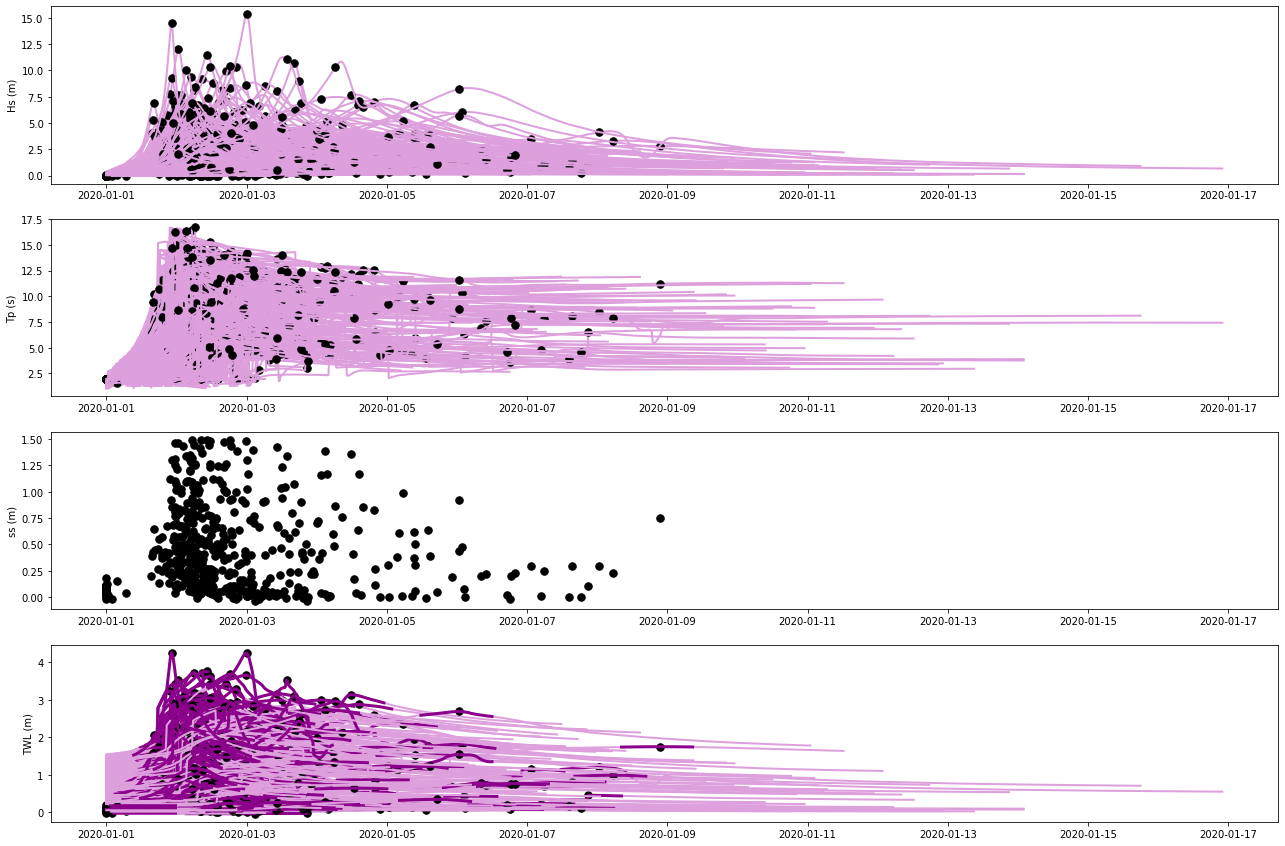

In [76]:
res=3 #Values per hour (3: 20mins)

fig=plt.figure(figsize=[22,15])
gs1=gridspec.GridSpec(4,1)
ax=fig.add_subplot(gs1[0])
ax1=fig.add_subplot(gs1[1],sharex=ax)
ax2=fig.add_subplot(gs1[2],sharex=ax)
ax3=fig.add_subplot(gs1[3],sharex=ax)

for s in TCs_sims_offsh.case.values:
    
    tcs_storm = TCs_sims_offsh.sel(case=s,point=7)
    # drop nans
    tcs_storm = tcs_storm.where(~np.isnan(tcs_storm.Hsig), drop=True)  
    
    # Storm Surge from Inverse Barometer from pressure min (not a time series)
    ss_storm = TCs_r2_MDA_params.pressure_min.sel(storm=s) - p_mean 
    ss_storm = -1*ss_storm  # (Inverse Barometer: mb to cm)
    tcs_storm['ss'] = ss_storm/100.0 # (cm to m)
    
#     tcs_storm['ss']=(-1*TCs_r2_MDA_params.pressure_min.sel(storm=s) - p_mean)/100 #Inverse barometer mb to cm --> Convert to meters /100
    
    # keep variables at WORST TWL
    tcs_storm['TWL']=0.053*tcs_storm.Hsig**(0.5)*tcs_storm.Tp + tcs_storm.ss
    twl_max, twl_max_id= [np.nanmax(tcs_storm.TWL, axis=0), np.nanargmax(tcs_storm.TWL)]
    tcs_storm_max = tcs_storm.isel(time=twl_max_id)  
    
    ax.plot(tcs_storm.time,tcs_storm.Hsig,color='plum',linewidth=2)
    ax.plot(tcs_storm.time[twl_max_id],tcs_storm.Hsig[twl_max_id],'k.',markersize=15)
    ax1.plot(tcs_storm.time,tcs_storm.Tp,color='plum',linewidth=2)
    ax1.plot(tcs_storm.time[twl_max_id],tcs_storm.Tp[twl_max_id],'k.',markersize=15)
    ax2.plot(tcs_storm.time[twl_max_id],tcs_storm.ss,'k.',markersize=15)
    ax3.plot(tcs_storm.time,tcs_storm.TWL,color='plum',linewidth=2)
    ax3.plot(tcs_storm.time[twl_max_id],tcs_storm.TWL[twl_max_id],'k.',markersize=15)
    ax.set_ylabel('Hs (m)'); ax1.set_ylabel('Tp (s)'); ax2.set_ylabel('ss (m)'); ax3.set_ylabel('TWL (m)')
    
    # calculate MU for each section in a 24 hours period (+-12 hours)
    
    
    if len(tcs_storm.time)<24*res:
        s1=np.arange(len(tcs_storm.time)).astype('int')
    else:     
        s1=np.arange(twl_max_id-13*res,twl_max_id+12*res-1)[np.where(np.arange(twl_max_id-13*res,twl_max_id+12*res-1)>0)[0]].astype('int')
        if (len(s1)<24*res) | (max(s1)>=len(tcs_storm.time)):
            if twl_max_id<12*res:
                s1=np.arange(0,24*res).astype('int')
            else:
                s1=np.arange(len(tcs_storm.time)-24*res, len(tcs_storm.time)).astype('int')

    ax3.plot(tcs_storm.time[s1],tcs_storm.TWL[s1],color='darkmagenta',linewidth=3)
    
    dt = 1.0/len(tcs_storm.time.values[s1])
    t_norm = np.linspace(dt, 1, num=len(tcs_storm.time.values[s1]))
    mu=np.trapz(np.divide(tcs_storm.TWL.values[s1], np.nanmax(tcs_storm.TWL.values[s1])), t_norm) # area debajo de la curva
    tcs_storm_max['mu'] = np.nanmax([mu, 0]) # si el runup es 0, mu queda nan, así pongo 0 en ese caso

    # concat cases
    if s==0:
        TCs_sims = tcs_storm_max        
    else:    
        TCs_sims = xr.concat([TCs_sims, tcs_storm_max], dim='storm')
        
TCs_sims = TCs_sims.rename({'Hsig':'hs','Tp':'tp','Dir':'dir','TWL':'twl'})        
print(TCs_sims)
db.Save_TCs_r2_mda_Simulations_hytc(TCs_sims)
